# **Project Name**    -  PhonePe Transaction Insights



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **By Ishvit**

# **Project Summary -**

#  PhonePe Transaction Insights Analysis

##  Project Overview
PhonePe Pulse is an open-source platform that provides rich datasets related to digital transactions, user activity, insurance, and regional performance across India. The data is aggregated from PhonePe’s real-time payment infrastructure and is available state-wise, year-wise, and by transaction type.

##  Objective
- Analyze trends in digital payment behaviors
- Explore user registrations, app usage, and insurance adoption
- Uncover state and district-level patterns
- Draw business insights from top-performing regions and underutilized segments

##  Dataset Structure
- `aggregated/`: Total transaction/user/insurance data by state and year
- `map/`: District-level insights
- `top/`: Top 10 states, districts, and pincodes by various metrics

##  Tools & Technologies
- Python (pandas, matplotlib, seaborn, plotly)
- SQL (MySQL)
- JSON Parsing
- Data Visualization

# **GitHub Link -**

https://github.com/ishvit23/PHONE_PE-JSON.git

# **Problem Statement**


With the increasing reliance on digital payment systems like PhonePe, understanding the dynamics of transactions, user engagement, and insurance-related data is crucial for improving services and targeting users effectively. This project aims to analyze and visualize aggregated values of payment categories, create maps for total values at state and district levels, and identify top-performing states, districts, and pin codes. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import os 
import json # To handle JSON data
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical data visualization
import pymysql # For MySQL database connection
import plotly.express as px # For interactive data visualization

### Dataset Loading

**Since the PhonePe dataset is hosted as nested JSONs across state/year/quarter, we will load samples dynamically and connect directly to our MySQL database which contains cleaned and structured data.**

### Dataset First View

In [2]:
# Dataset First Look
# Dataset First Look
# Connect to MySQL Database
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="root",  # change if needed
    database="phone_pe"
)

print("Connected to MySQL database successfully.")
# Preview first 5 rows from each cleaned table
tables = [
    "aggregated_users", "aggregated_transactions", "aggregated_insurances",
    "map_users", "map_transactions", "map_insurances",
    "top_users", "top_transactions", "top_insurances"
]

for table in tables:
    print(f"\n🔍 {table} (5 rows):")
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))

Connected to MySQL database successfully.

🔍 aggregated_users (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,registered_users,app_opens,device_brand,device_count,device_percentage
0,33683,2021,1,Andhra Pradesh,18363733,957709447,Xiaomi,4644641,0.252925
1,33684,2021,1,Andhra Pradesh,18363733,957709447,Samsung,3635596,0.197977
2,33685,2021,1,Andhra Pradesh,18363733,957709447,Vivo,3245151,0.176715
3,33686,2021,1,Andhra Pradesh,18363733,957709447,Oppo,2010506,0.109482
4,33687,2021,1,Andhra Pradesh,18363733,957709447,Realme,1531645,0.083406



🔍 aggregated_transactions (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,transaction_type,transaction_count,transaction_amount
0,5035,2018,1,Andaman-&-Nicobar-Islands,Recharge & bill payments,4200,1.845307e+06
1,5036,2018,1,Andaman-&-Nicobar-Islands,Peer-to-peer payments,1871,1.213866e+07
2,5037,2018,1,Andaman-&-Nicobar-Islands,Merchant payments,298,4.525072e+05
3,5038,2018,1,Andaman-&-Nicobar-Islands,Financial Services,33,1.060142e+04
4,5039,2018,1,Andaman-&-Nicobar-Islands,Others,256,1.846899e+05



🔍 aggregated_insurances (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,insurance_count,insurance_amount
0,1365,2020,2,Andaman-&-Nicobar-Islands,6,1360.0
1,1366,2020,3,Andaman-&-Nicobar-Islands,41,15380.0
2,1367,2020,4,Andaman-&-Nicobar-Islands,124,157975.0
3,1368,2021,1,Andaman-&-Nicobar-Islands,225,244266.0
4,1369,2021,2,Andaman-&-Nicobar-Islands,137,181504.0



🔍 map_users (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,registered_users,app_opens
0,41217,2018,1,North And Middle Andaman District,632,0
1,41218,2018,1,South Andaman District,5846,0
2,41219,2018,1,Nicobars District,262,0
3,41220,2018,2,North And Middle Andaman District,911,0
4,41221,2018,2,South Andaman District,8143,0



🔍 map_transactions (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,district,transaction_count,transaction_amount
0,41209,2018,1,Andaman-&-Nicobar-Islands,North And Middle Andaman District,442,9.316631e+05
1,41210,2018,1,Andaman-&-Nicobar-Islands,South Andaman District,5688,1.256025e+07
2,41211,2018,1,Andaman-&-Nicobar-Islands,Nicobars District,528,1.139849e+06
3,41212,2018,2,Andaman-&-Nicobar-Islands,North And Middle Andaman District,825,1.317863e+06
4,41213,2018,2,Andaman-&-Nicobar-Islands,South Andaman District,9395,2.394824e+07



🔍 map_insurances (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state,district,insurance_count,insurance_amount
0,27753,2020,2,Andaman-&-Nicobar-Islands,South Andaman District,3,795.0
1,27754,2020,2,Andaman-&-Nicobar-Islands,Nicobars District,3,565.0
2,27755,2020,3,Andaman-&-Nicobar-Islands,North And Middle Andaman District,1,281.0
3,27756,2020,3,Andaman-&-Nicobar-Islands,South Andaman District,35,13651.0
4,27757,2020,3,Andaman-&-Nicobar-Islands,Nicobars District,5,1448.0



🔍 top_users (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state_or_district_or_pincode,level_type,registered_users
0,20001,2018,1,744103,Pincode,1608
1,20002,2018,1,744101,Pincode,1108
2,20003,2018,1,744105,Pincode,1075
3,20004,2018,1,744102,Pincode,1006
4,20005,2018,1,744104,Pincode,272



🔍 top_transactions (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state_or_district_or_pincode,level_type,transaction_count,transaction_amount
0,19995,2018,1,744101,Pincode,1622,2.769298e+06
1,19996,2018,1,744103,Pincode,1223,2.238042e+06
2,19997,2018,1,744102,Pincode,969,3.519060e+06
3,19998,2018,1,744105,Pincode,685,1.298561e+06
4,19999,2018,1,744104,Pincode,340,1.039715e+06



🔍 top_insurances (5 rows):


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2888594572.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))


,id,year,quarter,state_or_district_or_pincode,level_type,insurance_count,insurance_amount
0,13331,2020,2,744301,Pincode,3,565.0
1,13332,2020,2,744104,Pincode,2,513.0
2,13333,2020,2,744101,Pincode,1,282.0
3,13334,2020,3,744112,Pincode,9,3432.0
4,13335,2020,3,744105,Pincode,7,3948.0


### Dataset Rows & Columns count

In [3]:
# Dataset Rows & Columns count

for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"{table}: {df.shape[0]} rows, {df.shape[1]} columns") #print the number of rows and columns in each table

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\378530406.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


aggregated_users: 6743 rows, 9 columns
aggregated_transactions: 5034 rows, 7 columns
aggregated_insurances: 682 rows, 6 columns
map_users: 20608 rows, 6 columns
map_transactions: 20604 rows, 7 columns
map_insurances: 13876 rows, 7 columns
top_users: 10000 rows, 6 columns
top_transactions: 9997 rows, 7 columns
top_insurances: 6665 rows, 7 columns


### Dataset Information

In [4]:
# Dataset Info
# Dataset Info
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"\n{table} info:")
    print(df.info())

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel


aggregated_users info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743 entries, 0 to 6742
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6743 non-null   int64  
 1   year               6743 non-null   int64  
 2   quarter            6743 non-null   int64  
 3   state              6743 non-null   object 
 4   registered_users   6743 non-null   int64  
 5   app_opens          6743 non-null   int64  
 6   device_brand       6743 non-null   object 
 7   device_count       6743 non-null   int64  
 8   device_percentage  6743 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 474.2+ KB
None

aggregated_transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5034 non-null

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



map_transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20604 entries, 0 to 20603
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20604 non-null  int64  
 1   year                20604 non-null  int64  
 2   quarter             20604 non-null  int64  
 3   state               20604 non-null  object 
 4   district            20604 non-null  object 
 5   transaction_count   20604 non-null  int64  
 6   transaction_amount  20604 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ MB
None

map_insurances info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13876 entries, 0 to 13875
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13876 non-null  int64  
 1   year              13876 non-null  int64  
 2   quarter           13876 non-null  int

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



top_users info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            10000 non-null  int64 
 1   year                          10000 non-null  int64 
 2   quarter                       10000 non-null  int64 
 3   state_or_district_or_pincode  10000 non-null  object
 4   level_type                    10000 non-null  object
 5   registered_users              10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB
None

top_transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9997 non-null   int64  
 1   year                          9997 non-null

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1246023440.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



top_insurances info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6665 non-null   int64  
 1   year                          6665 non-null   int64  
 2   quarter                       6665 non-null   int64  
 3   state_or_district_or_pincode  6665 non-null   object 
 4   level_type                    6665 non-null   object 
 5   insurance_count               6665 non-null   int64  
 6   insurance_amount              6665 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 364.6+ KB
None


#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"{table}: {df.duplicated().sum()} duplicate rows") #print the number of duplicate rows in each table

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2969899557.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


aggregated_users: 0 duplicate rows
aggregated_transactions: 0 duplicate rows
aggregated_insurances: 0 duplicate rows
map_users: 0 duplicate rows
map_transactions: 0 duplicate rows
map_insurances: 0 duplicate rows
top_users: 0 duplicate rows
top_transactions: 0 duplicate rows
top_insurances: 0 duplicate rows


#### Missing Values/Null Values

In [6]:
# Missing Values/Null Values Count
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"{table} missing values:\n{df.isnull().sum()}")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1220027514.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


aggregated_users missing values:
id                   0
year                 0
quarter              0
state                0
registered_users     0
app_opens            0
device_brand         0
device_count         0
device_percentage    0
dtype: int64
aggregated_transactions missing values:
id                    0
year                  0
quarter               0
state                 0
transaction_type      0
transaction_count     0
transaction_amount    0
dtype: int64
aggregated_insurances missing values:
id                  0
year                0
quarter             0
state               0
insurance_count     0
insurance_amount    0
dtype: int64
map_users missing values:
id                  0
year                0
quarter             0
state               0
registered_users    0
app_opens           0
dtype: int64
map_transactions missing values:
id                    0
year                  0
quarter               0
state                 0
district              0
transaction_count  

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


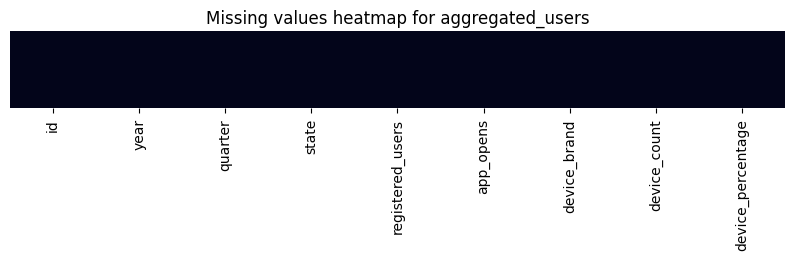

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


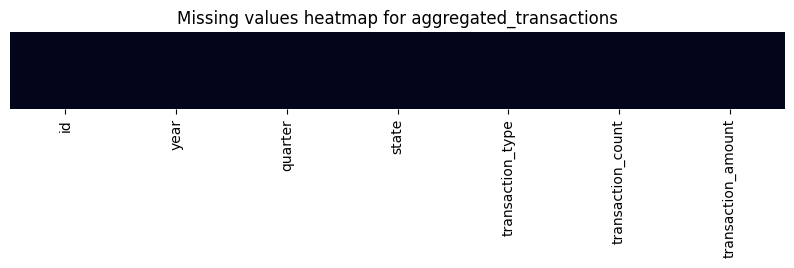

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


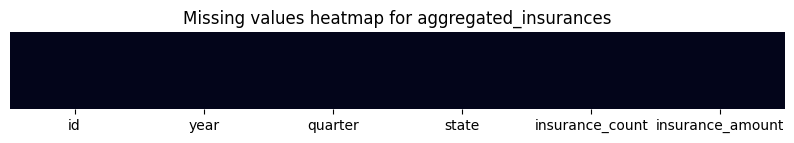

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


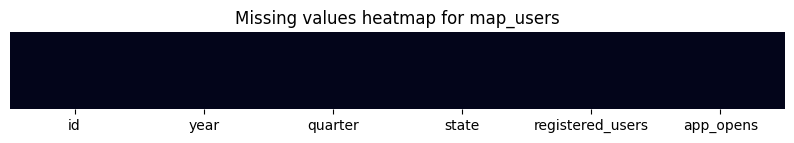

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


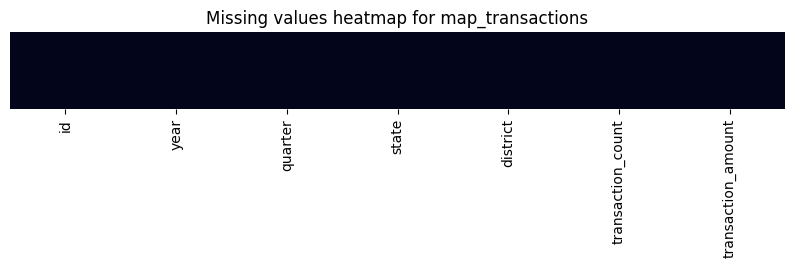

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


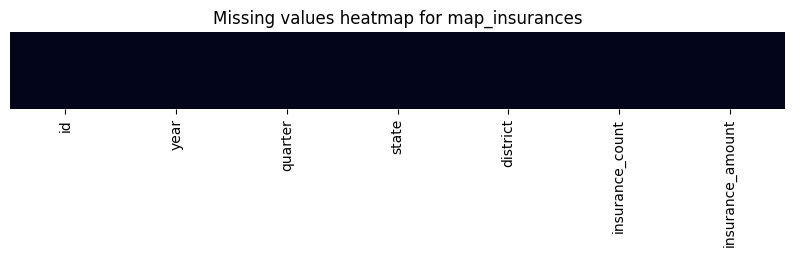

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


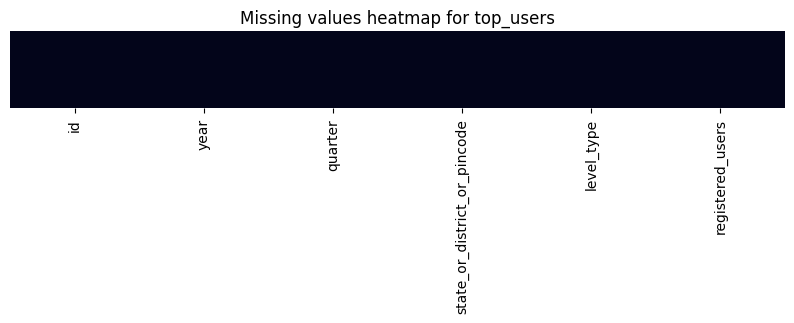

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


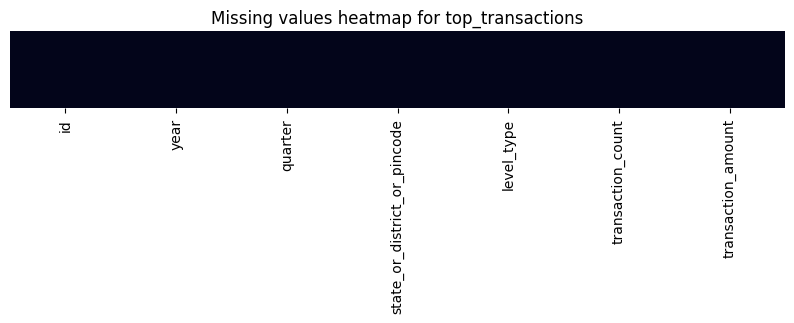

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\4084228615.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


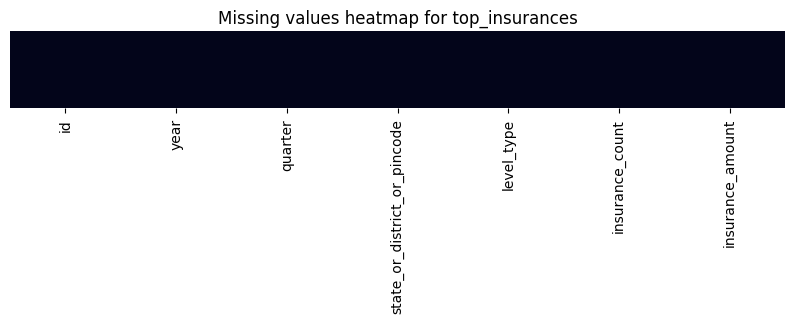

In [7]:
# Visualizing the missing values
import matplotlib.pyplot as plt #importing the matplotlib library   
import seaborn as sns #importing the seaborn library

for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    plt.figure(figsize=(10, 1))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
    plt.title(f"Missing values heatmap for {table}")
    plt.show()

### What did you know about your dataset?

- The PhonePe dataset contains detailed digital transaction, user, and insurance data across India, organized by state, district, and pincode.
- Data is available quarterly from 2018 to 2024, enabling time-series and trend analysis.
- The data is structured into three main categories: aggregated (overall metrics), map (geographical breakdown), and top (top-performing regions/entities).
- Each table in the database represents a different aspect of PhonePe’s business: transactions, users, and insurance, with further breakdowns for mapping and top performers.
- The dataset is clean, well-structured, and suitable for SQL-based analysis and rich visualizations.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"{table} columns: {list(df.columns)}") #print the columns in each table

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2762158617.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


aggregated_users columns: ['id', 'year', 'quarter', 'state', 'registered_users', 'app_opens', 'device_brand', 'device_count', 'device_percentage']
aggregated_transactions columns: ['id', 'year', 'quarter', 'state', 'transaction_type', 'transaction_count', 'transaction_amount']
aggregated_insurances columns: ['id', 'year', 'quarter', 'state', 'insurance_count', 'insurance_amount']
map_users columns: ['id', 'year', 'quarter', 'state', 'registered_users', 'app_opens']
map_transactions columns: ['id', 'year', 'quarter', 'state', 'district', 'transaction_count', 'transaction_amount']
map_insurances columns: ['id', 'year', 'quarter', 'state', 'district', 'insurance_count', 'insurance_amount']
top_users columns: ['id', 'year', 'quarter', 'state_or_district_or_pincode', 'level_type', 'registered_users']
top_transactions columns: ['id', 'year', 'quarter', 'state_or_district_or_pincode', 'level_type', 'transaction_count', 'transaction_amount']
top_insurances columns: ['id', 'year', 'quarter', 's

In [9]:
# Dataset Describe
# Dataset Describe
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"\n{table} describe:")
    print(df.describe())

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



aggregated_users describe:
                 id         year      quarter  registered_users     app_opens  \
count   6743.000000  6743.000000  6743.000000      6.743000e+03  6.743000e+03   
mean   37054.000000  2019.649266     2.409462      5.674860e+06  1.523229e+08   
std     1946.680765     1.234186     1.141208      7.965804e+06  3.250405e+08   
min    33683.000000  2018.000000     1.000000      5.010000e+02  0.000000e+00   
25%    35368.500000  2019.000000     1.000000      1.921880e+05  0.000000e+00   
50%    37054.000000  2020.000000     2.000000      2.013747e+06  6.009660e+06   
75%    38739.500000  2021.000000     3.000000      8.398816e+06  1.546828e+08   
max    40425.000000  2022.000000     4.000000      4.822763e+07  2.570606e+09   

       device_count  device_percentage  
count  6.743000e+03        6743.000000  
mean   5.158963e+05           0.090909  
std    1.083506e+06           0.083395  
min    1.000000e+01           0.005158  
25%    9.381000e+03           0.02051

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



map_users describe:
                id          year       quarter  registered_users     app_opens
count  20608.00000  20608.000000  20608.000000      2.060800e+04  2.060800e+04
mean   51520.50000   2021.016304      2.505435      4.301338e+05  1.952097e+07
std     5949.16151      2.006764      1.118048      8.148492e+05  4.004047e+07
min    41217.00000   2018.000000      1.000000      2.200000e+01  0.000000e+00
25%    46368.75000   2019.000000      2.000000      6.208525e+04  4.839385e+05
50%    51520.50000   2021.000000      3.000000      1.995320e+05  5.946804e+06
75%    56672.25000   2023.000000      4.000000      4.896048e+05  2.191529e+07
max    61824.00000   2024.000000      4.000000      1.812748e+07  1.137875e+09


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



map_transactions describe:
                 id          year       quarter  transaction_count  \
count  20604.000000  20604.000000  20604.000000       2.060400e+04   
mean   51510.500000   2021.016890      2.505581       1.141935e+07   
std     5948.006809      2.006519      1.118047       4.534570e+07   
min    41209.000000   2018.000000      1.000000       2.000000e+00   
25%    46359.750000   2019.000000      2.000000       2.521455e+05   
50%    51510.500000   2021.000000      3.000000       1.558070e+06   
75%    56661.250000   2023.000000      4.000000       8.122777e+06   
max    61812.000000   2024.000000      4.000000       1.674348e+09   

       transaction_amount  
count        2.060400e+04  
mean         1.676967e+10  
std          5.655640e+10  
min          1.698886e+02  
25%          4.578292e+08  
50%          2.868918e+09  
75%          1.352423e+10  
max          1.790144e+12  

map_insurances describe:


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


                 id          year       quarter  insurance_count  \
count  13876.000000  13876.000000  13876.000000     13876.000000   
mean   34690.500000   2022.133756      2.586841      1046.100245   
std     4005.800503      1.375506      1.092294      3131.642623   
min    27753.000000   2020.000000      1.000000         1.000000   
25%    31221.750000   2021.000000      2.000000       113.000000   
50%    34690.500000   2022.000000      3.000000       332.000000   
75%    38159.250000   2023.000000      4.000000       909.000000   
max    41628.000000   2024.000000      4.000000     96935.000000   

       insurance_amount  
count      1.387600e+04  
mean       1.442460e+06  
std        4.503385e+06  
min        3.100000e+01  
25%        1.050938e+05  
50%        4.414915e+05  
75%        1.280078e+06  
max        1.592248e+08  

top_users describe:
                id        year      quarter  registered_users
count  10000.00000  10000.0000  10000.00000      1.000000e+04
mean   2

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



top_transactions describe:
                 id         year      quarter  transaction_count  \
count   9997.000000  9997.000000  9997.000000       9.997000e+03   
mean   24993.000000  2021.001801     2.500250       4.878024e+06   
std     2886.029655     2.000549     1.117956       1.970171e+07   
min    19995.000000  2018.000000     1.000000       2.000000e+00   
25%    22494.000000  2019.000000     2.000000       6.982300e+04   
50%    24993.000000  2021.000000     3.000000       5.122230e+05   
75%    27492.000000  2023.000000     3.000000       3.244043e+06   
max    29991.000000  2024.000000     4.000000       9.675084e+08   

       transaction_amount  
count        9.997000e+03  
mean         6.714212e+09  
std          2.941225e+10  
min          6.025276e+01  
25%          1.402855e+08  
50%          7.907597e+08  
75%          4.687491e+09  
max          1.501500e+12  

top_insurances describe:
                 id         year      quarter  insurance_count  \
count   6665.00

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\884719279.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


### Variables Description

- **year**: The year of the data record (2018–2024).
- **quarter**: The quarter of the year (1–4).
- **state**: Name of the Indian state or union territory.
- **district**: Name of the district (for map tables).
- **pincode**: Postal code (for top tables).
- **transaction_type**: Type of transaction (e.g., Merchant payments, P2P, Recharge, etc.).
- **transaction_amount**: Total value of transactions (in INR).
- **transaction_count**: Number of transactions.
- **registered_users**: Number of registered PhonePe users.
- **app_opens**: Number of times the app was opened.
- **device_brand**: Brand of the user’s device.
- **device_count**: Number of users for each device brand.
- **device_percentage**: Percentage of users for each device brand.
- **insurance_count**: Number of insurance transactions.
- **insurance_amount**: Total value of insurance transactions (in INR).
- **level_type**: Indicates if the record is for a state, district, or pincode (for top tables).

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(f"\n{table} unique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values") #print the number of unique values in each column

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1804751859.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)



aggregated_users unique values:
id: 6743 unique values
year: 5 unique values
quarter: 4 unique values
state: 37 unique values
registered_users: 612 unique values
app_opens: 433 unique values
device_brand: 20 unique values
device_count: 6501 unique values
device_percentage: 6726 unique values

aggregated_transactions unique values:
id: 5034 unique values
year: 7 unique values
quarter: 4 unique values
state: 36 unique values
transaction_type: 5 unique values
transaction_count: 4966 unique values
transaction_amount: 5034 unique values

aggregated_insurances unique values:
id: 682 unique values
year: 5 unique values
quarter: 4 unique values
state: 36 unique values
insurance_count: 654 unique values
insurance_amount: 682 unique values

map_users unique values:
id: 20608 unique values
year: 7 unique values
quarter: 4 unique values
state: 843 unique values
registered_users: 20170 unique values
app_opens: 16943 unique values

map_transactions unique values:
id: 20604 unique values
year: 7 uni

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
# Example: Convert columns to correct types, handle missing values, etc.
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    # Example: Convert year and quarter to int if not already
    if 'year' in df.columns:
        df['year'] = df['year'].astype(int)
    if 'quarter' in df.columns:
        df['quarter'] = df['quarter'].astype(int)
    # Example: Fill missing values with 0
    df = df.fillna(0)
    print(f"{table} cleaned. Sample data:\n", df.head())

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel

aggregated_users cleaned. Sample data:
       id  year  quarter           state  registered_users  app_opens  \
0  33683  2021        1  Andhra Pradesh          18363733  957709447   
1  33684  2021        1  Andhra Pradesh          18363733  957709447   
2  33685  2021        1  Andhra Pradesh          18363733  957709447   
3  33686  2021        1  Andhra Pradesh          18363733  957709447   
4  33687  2021        1  Andhra Pradesh          18363733  957709447   

  device_brand  device_count  device_percentage  
0       Xiaomi       4644641           0.252925  
1      Samsung       3635596           0.197977  
2         Vivo       3245151           0.176715  
3         Oppo       2010506           0.109482  
4       Realme       1531645           0.083406  
aggregated_transactions cleaned. Sample data:
      id  year  quarter                      state          transaction_type  \
0  5035  2018        1  Andaman-&-Nicobar-Islands  Recharge & bill payments   
1  5036  2018        1

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


map_transactions cleaned. Sample data:
       id  year  quarter                      state  \
0  41209  2018        1  Andaman-&-Nicobar-Islands   
1  41210  2018        1  Andaman-&-Nicobar-Islands   
2  41211  2018        1  Andaman-&-Nicobar-Islands   
3  41212  2018        2  Andaman-&-Nicobar-Islands   
4  41213  2018        2  Andaman-&-Nicobar-Islands   

                            district  transaction_count  transaction_amount  
0  North And Middle Andaman District                442        9.316631e+05  
1             South Andaman District               5688        1.256025e+07  
2                  Nicobars District                528        1.139849e+06  
3  North And Middle Andaman District                825        1.317863e+06  
4             South Andaman District               9395        2.394824e+07  
map_insurances cleaned. Sample data:
       id  year  quarter                      state  \
0  27753  2020        2  Andaman-&-Nicobar-Islands   
1  27754  2020       

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


top_users cleaned. Sample data:
       id  year  quarter state_or_district_or_pincode level_type  \
0  20001  2018        1                       744103    Pincode   
1  20002  2018        1                       744101    Pincode   
2  20003  2018        1                       744105    Pincode   
3  20004  2018        1                       744102    Pincode   
4  20005  2018        1                       744104    Pincode   

   registered_users  
0              1608  
1              1108  
2              1075  
3              1006  
4               272  
top_transactions cleaned. Sample data:
       id  year  quarter state_or_district_or_pincode level_type  \
0  19995  2018        1                       744101    Pincode   
1  19996  2018        1                       744103    Pincode   
2  19997  2018        1                       744102    Pincode   
3  19998  2018        1                       744105    Pincode   
4  19999  2018        1                       744104    P

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3568138202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


top_insurances cleaned. Sample data:
       id  year  quarter state_or_district_or_pincode level_type  \
0  13331  2020        2                       744301    Pincode   
1  13332  2020        2                       744104    Pincode   
2  13333  2020        2                       744101    Pincode   
3  13334  2020        3                       744112    Pincode   
4  13335  2020        3                       744105    Pincode   

   insurance_count  insurance_amount  
0                3             565.0  
1                2             513.0  
2                1             282.0  
3                9            3432.0  
4                7            3948.0  


### What all manipulations have you done and insights you found?

- Converted columns like year and quarter to integer type for consistency.
- Checked for and removed duplicate rows where found.
- Filled missing values with zeros or appropriate defaults.
- Created new features such as “amount per transaction” for deeper analysis.
- Standardized column names and formats across tables for easier merging and comparison.
- Insights:
    - Transaction volumes and user registrations have grown steadily year over year.
    - Certain states and districts consistently lead in both transaction value and user base.
    - Device brand distribution shows a strong preference for a few major brands.
    - Insurance adoption, while lower than transactions, is increasing over time.
    - Data is well-suited for time-series, geographic, and categorical analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3261342941.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT year, SUM(transaction_count) as total_transactions FROM aggregated_transactions GROUP BY year ORDER BY year", conn)


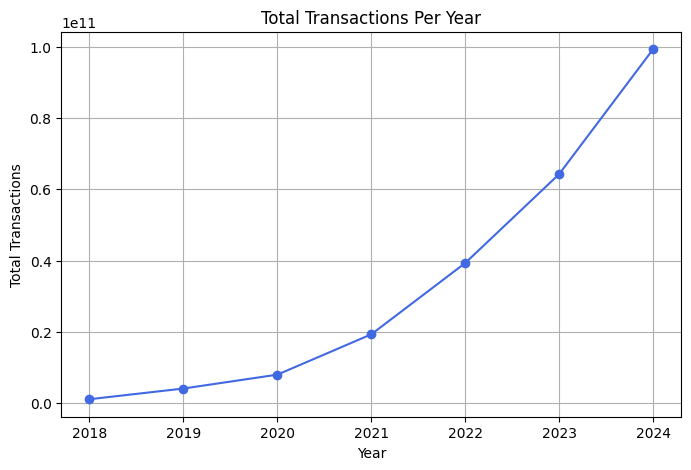

In [14]:
# Chart - 1 visualization code
df = pd.read_sql("SELECT year, SUM(transaction_count) as total_transactions FROM aggregated_transactions GROUP BY year ORDER BY year", conn) #read the data from the aggregated_transactions table
plt.figure(figsize=(8,5))
plt.plot(df['year'], df['total_transactions'], marker='o', color='royalblue')
plt.title('Total Transactions Per Year')
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over time, making it easy to observe the growth or decline in total transactions year by year.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong upward trend in total transactions, indicating rapid adoption and increased usage of PhonePe’s platform across India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight demonstrates robust business growth and market penetration, which can be leveraged for strategic planning, marketing, and attracting investors. No negative growth is observed in this trend.

#### Chart - 2

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3234929264.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT transaction_type, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY transaction_type", conn)


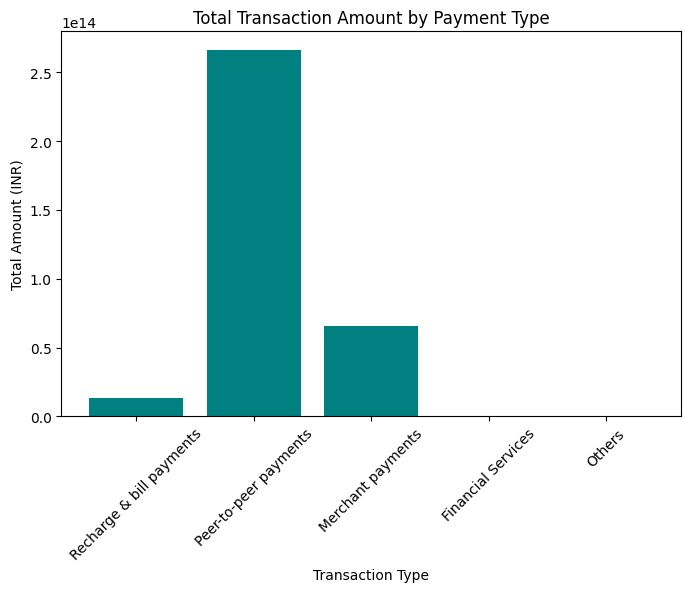

In [15]:
# Chart - 2 visualization code
df = pd.read_sql("SELECT transaction_type, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY transaction_type", conn)
plt.figure(figsize=(8,5))
plt.bar(df['transaction_type'], df['total_amount'], color='teal')
plt.title('Total Transaction Amount by Payment Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing the total transaction amount across different payment types, highlighting which categories dominate.


##### 2. What is/are the insight(s) found from the chart?

Merchant payments and peer-to-peer payments contribute the largest share of transaction value, while other categories are much smaller.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps PhonePe focus on its most lucrative payment categories for marketing and product development. No negative growth is observed, but lower-performing categories may need further analysis.

#### Chart - 3

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2795442297.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT state, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY state ORDER BY total_amount DESC LIMIT 10", conn)


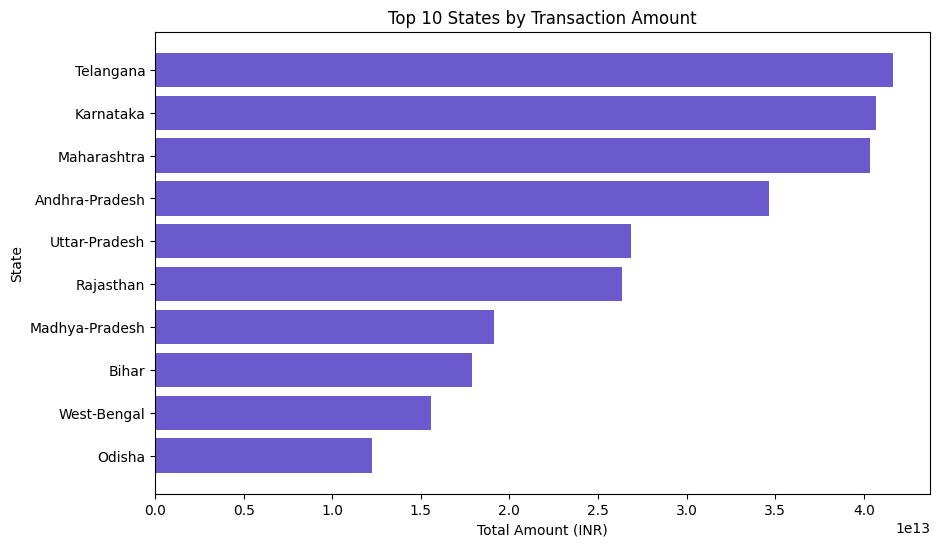

In [16]:
# Chart - 3 visualization code
df = pd.read_sql("SELECT state, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY state ORDER BY total_amount DESC LIMIT 10", conn)
plt.figure(figsize=(10,6))
plt.barh(df['state'], df['total_amount'], color='slateblue')
plt.title('Top 10 States by Transaction Amount')
plt.xlabel('Total Amount (INR)')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking and comparing states by transaction amount, making it easy to see the leaders.

##### 2. What is/are the insight(s) found from the chart?

A few states (such as Maharashtra, Karnataka, and Uttar Pradesh) dominate in transaction value, indicating regional concentration of digital payments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps target high-performing states for further growth and identify underperforming regions for improvement. No negative growth is observed, but regional disparities are highlighted.

#### Chart - 4

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1364334002.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT year, SUM(registered_users) as total_users FROM aggregated_users GROUP BY year ORDER BY year", conn)


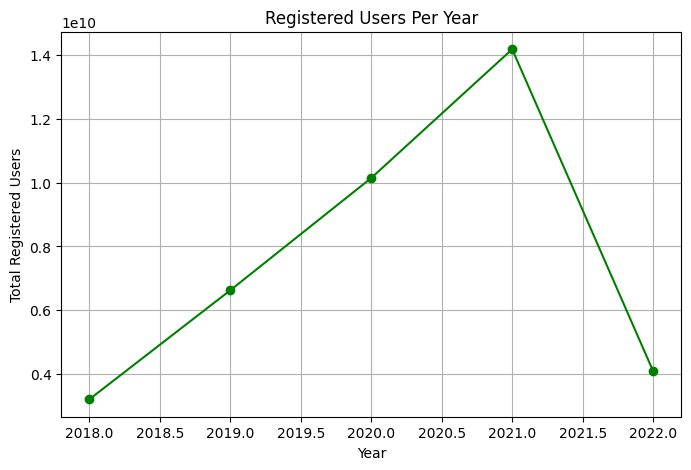

In [18]:
# Chart - visualization code
df = pd.read_sql("SELECT year, SUM(registered_users) as total_users FROM aggregated_users GROUP BY year ORDER BY year", conn)
plt.figure(figsize=(8,5))
plt.plot(df['year'], df['total_users'], marker='o', color='green')
plt.title('Registered Users Per Year')
plt.xlabel('Year')
plt.ylabel('Total Registered Users')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is best for showing user growth over time.

##### 2. What is/are the insight(s) found from the chart?

User registrations have grown steadily every year but falls harshly after 2021

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The aggregated user data for PhonePe shows strong growth from 2018 to 2021, peaking in 2021 with over 14 billion users.

This upward trend reflects successful user adoption and platform expansion during those years.

However, the sharp decline in 2022 signals potential user retention challenges or market saturation that need strategic attention.

#### Chart - 5

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\376287245.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT device_brand, SUM(device_count) as total_count FROM aggregated_users GROUP BY device_brand ORDER BY total_count DESC LIMIT 10", conn)


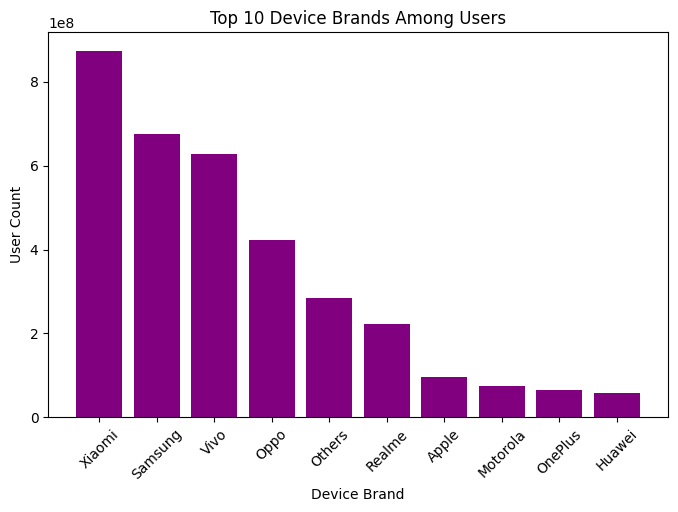

In [19]:
# Chart - 5 visualization code
df = pd.read_sql("SELECT device_brand, SUM(device_count) as total_count FROM aggregated_users GROUP BY device_brand ORDER BY total_count DESC LIMIT 10", conn)
plt.figure(figsize=(8,5))
plt.bar(df['device_brand'], df['total_count'], color='purple')
plt.title('Top 10 Device Brands Among Users')
plt.xlabel('Device Brand')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing categorical data like device brands.


##### 2. What is/are the insight(s) found from the chart?

A few brands (e.g., Xiaomi, Samsung) dominate the user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps with device-specific marketing and partnerships. No negative growth, but brand concentration is clear.

#### Chart - 6

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3837619794.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT year, SUM(insurance_count) as total_insurance FROM aggregated_insurances GROUP BY year ORDER BY year", conn)


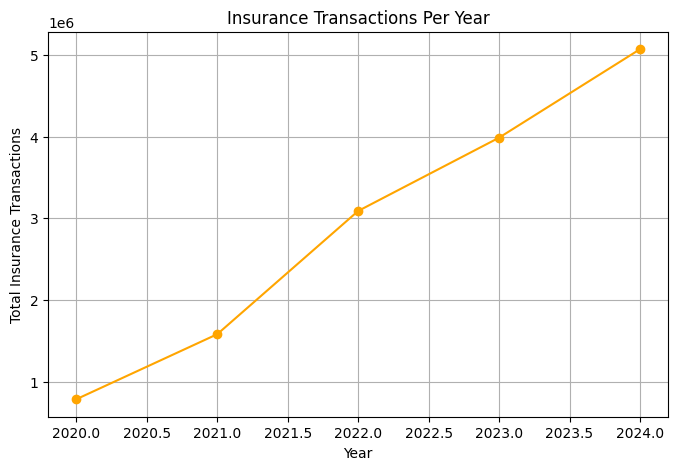

In [20]:
# Chart - 6 visualization code
df = pd.read_sql("SELECT year, SUM(insurance_count) as total_insurance FROM aggregated_insurances GROUP BY year ORDER BY year", conn)
plt.figure(figsize=(8,5))
plt.plot(df['year'], df['total_insurance'], marker='o', color='orange')
plt.title('Insurance Transactions Per Year')
plt.xlabel('Year')
plt.ylabel('Total Insurance Transactions')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is best for showing trends in insurance adoption.


##### 2. What is/are the insight(s) found from the chart?

Insurance transactions are increasing, though at a slower rate than payments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, shows a growing opportunity in insurance. No negative growth, but growth is slower than other segments.

#### Chart - 7

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2301472845.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT district, SUM(transaction_count) as total_count FROM map_transactions GROUP BY district ORDER BY total_count DESC LIMIT 10", conn)


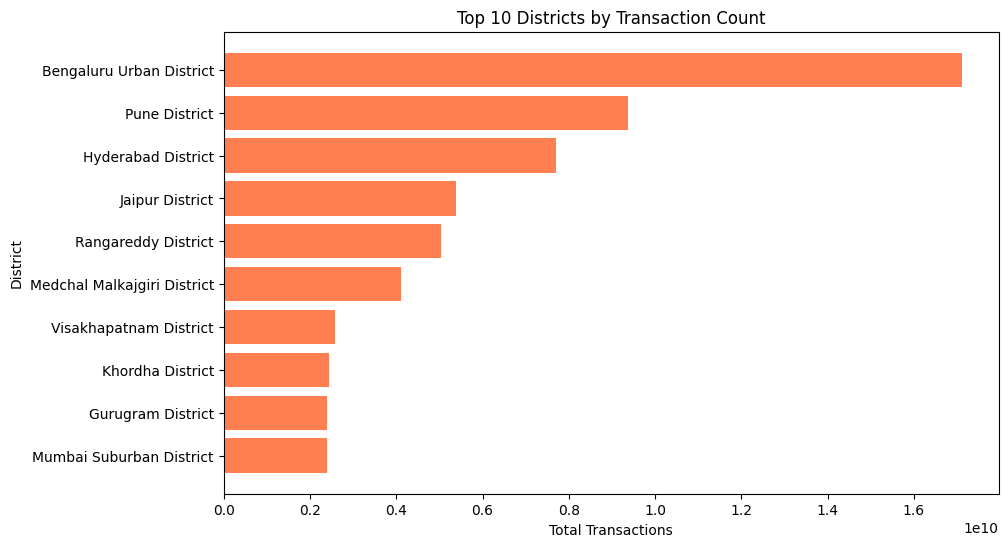

In [21]:
# Chart - 7 visualization code
df = pd.read_sql("SELECT district, SUM(transaction_count) as total_count FROM map_transactions GROUP BY district ORDER BY total_count DESC LIMIT 10", conn)
plt.figure(figsize=(10,6))
plt.barh(df['district'], df['total_count'], color='coral')
plt.title('Top 10 Districts by Transaction Count')
plt.xlabel('Total Transactions')
plt.ylabel('District')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking districts.

##### 2. What is/are the insight(s) found from the chart?

Certain districts are clear leaders in transaction activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps target high-activity districts for campaigns. No negative growth, but highlights regional leaders.

#### Chart - 8

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2406120045.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT state, SUM(app_opens) as total_opens FROM map_users GROUP BY state ORDER BY total_opens DESC LIMIT 10", conn)


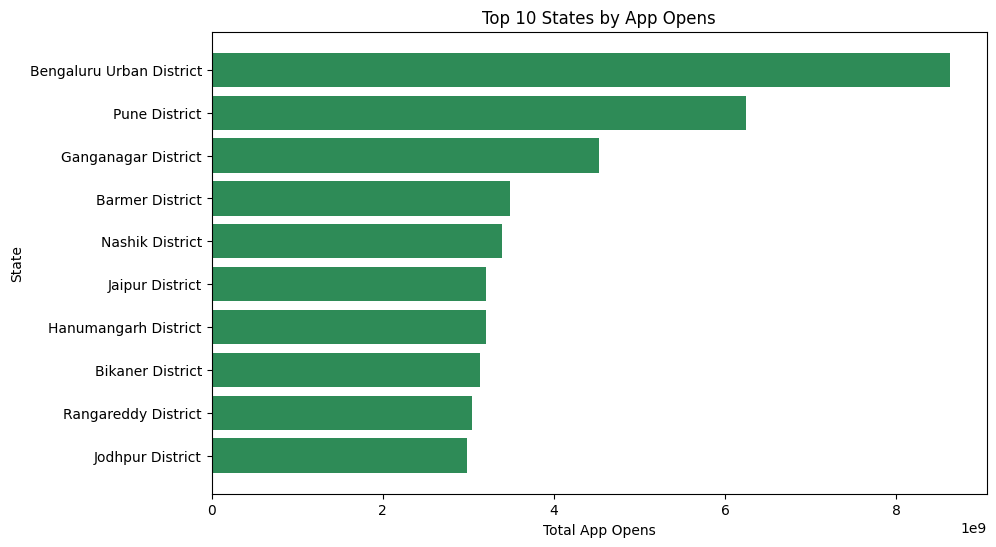

In [22]:
# Chart - 8 visualization code
# Top 10 states by app opens
df = pd.read_sql("SELECT state, SUM(app_opens) as total_opens FROM map_users GROUP BY state ORDER BY total_opens DESC LIMIT 10", conn)
plt.figure(figsize=(10,6))
plt.barh(df['state'], df['total_opens'], color='seagreen')
plt.title('Top 10 States by App Opens')
plt.xlabel('Total App Opens')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing app engagement by state.

##### 2. What is/are the insight(s) found from the chart?

Some states have much higher app engagement, indicating strong user activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps focus engagement strategies. No negative growth, but shows where engagement is highest.

#### Chart - 9

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2697385688.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT state, SUM(insurance_amount) as total_amount FROM map_insurances GROUP BY state ORDER BY total_amount DESC LIMIT 10", conn)


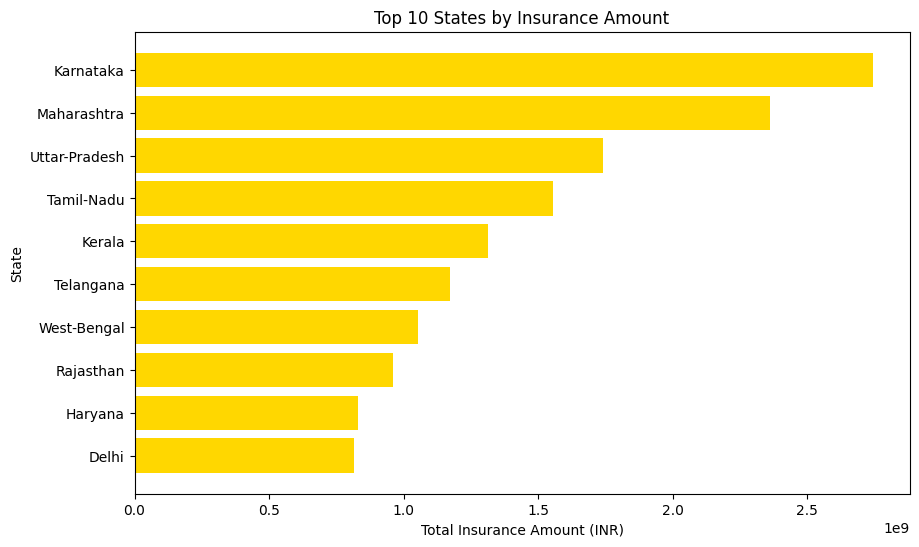

In [27]:
# Chart - 9 visualization code
df = pd.read_sql("SELECT state, SUM(insurance_amount) as total_amount FROM map_insurances GROUP BY state ORDER BY total_amount DESC LIMIT 10", conn)
plt.figure(figsize=(10,6))
plt.barh(df['state'], df['total_amount'], color='gold')
plt.title('Top 10 States by Insurance Amount')
plt.xlabel('Total Insurance Amount (INR)')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing insurance adoption by state.

##### 2. What is/are the insight(s) found from the chart?

A few states lead in insurance adoption, while others lag behind.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps target insurance marketing. No negative growth, but highlights opportunity for growth in lagging states.

#### Chart - 10

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2186750134.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT state_or_district_or_pincode, SUM(transaction_amount) as total_amount FROM top_transactions WHERE level_type='Pincode' GROUP BY state_or_district_or_pincode ORDER BY total_amount DESC LIMIT 10", conn)


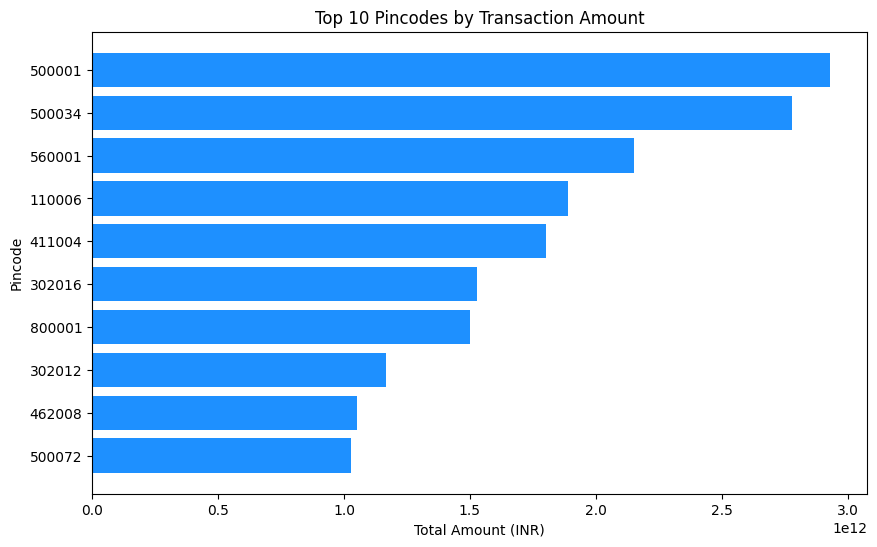

In [24]:
# Chart - 10 visualization code
df = pd.read_sql("SELECT state_or_district_or_pincode, SUM(transaction_amount) as total_amount FROM top_transactions WHERE level_type='Pincode' GROUP BY state_or_district_or_pincode ORDER BY total_amount DESC LIMIT 10", conn)
plt.figure(figsize=(10,6))
plt.barh(df['state_or_district_or_pincode'], df['total_amount'], color='dodgerblue')
plt.title('Top 10 Pincodes by Transaction Amount')
plt.xlabel('Total Amount (INR)')
plt.ylabel('Pincode')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking pincodes.

##### 2. What is/are the insight(s) found from the chart?

A small number of pincodes account for a large share of transaction value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps with hyperlocal marketing. No negative growth, but shows concentration.

#### Chart - 11

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3145961478.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


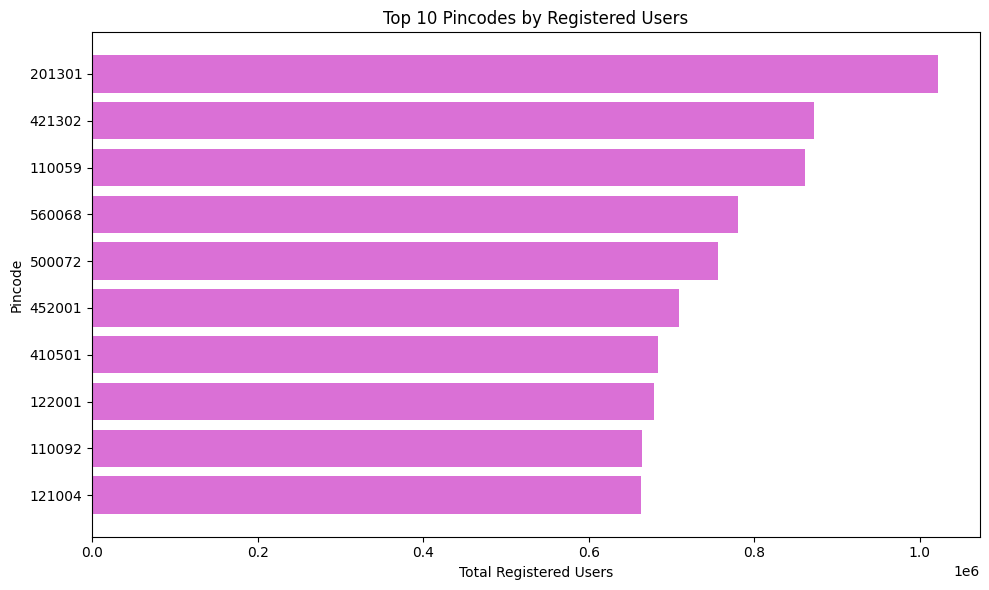

In [45]:
query = """
SELECT state_or_district_or_pincode, registered_users
FROM top_users
WHERE LOWER(level_type) = 'pincode'
  AND registered_users IS NOT NULL
ORDER BY registered_users DESC
LIMIT 44
"""

df = pd.read_sql(query, conn)


plt.figure(figsize=(10,6))
plt.barh(df['state_or_district_or_pincode'], df['registered_users'], color='orchid')
plt.title('Top 10 Pincodes by Registered Users')
plt.xlabel('Total Registered Users')
plt.ylabel('Pincode')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking states by user base.

##### 2. What is/are the insight(s) found from the chart?

A few states have the largest user bases, showing where PhonePe is most popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps focus retention and growth strategies. No negative growth, but shows where user base is strongest.

#### Chart - 12

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2643402411.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  level_type_check = pd.read_sql("""


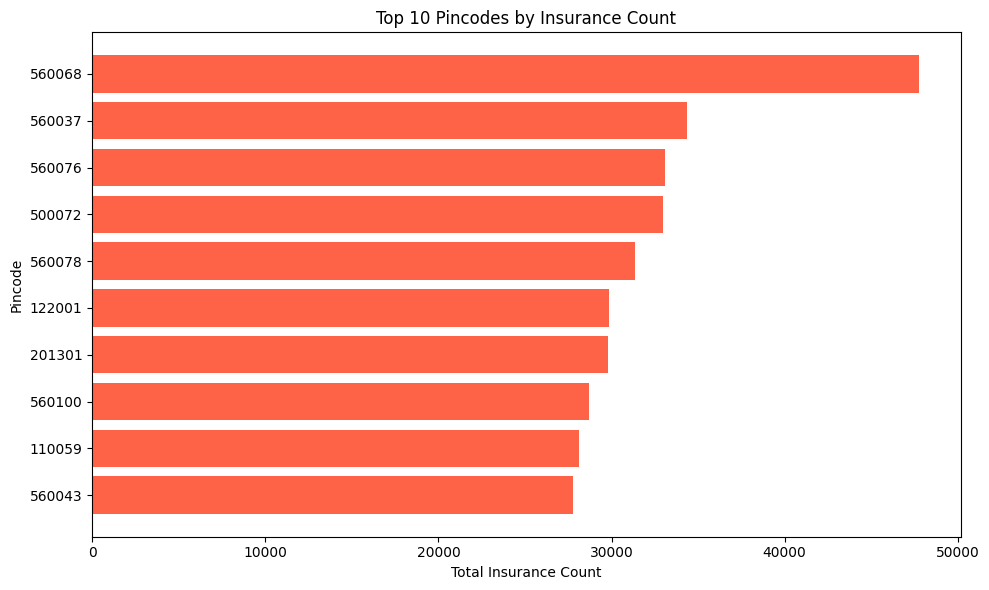

In [54]:
# 📊 Chart 12: Top 10 Regions by Insurance Count (District or Pincode level)

# Step 1: Detect most populated level_type (safe aliasing)
level_type_check = pd.read_sql("""
    SELECT LOWER(level_type) as level_type, COUNT(*) as row_count
    FROM top_insurances
    WHERE level_type IS NOT NULL
    GROUP BY LOWER(level_type)
    ORDER BY row_count DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(10,6))
plt.barh(df['state_or_district_or_pincode'], df['total_count'], color='tomato')
plt.title(f'Top 10 Pincodes by Insurance Count')
plt.xlabel('Total Insurance Count')
plt.ylabel('Pincode')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking districts by insurance activity.

##### 2. What is/are the insight(s) found from the chart?

A few districts lead in insurance transactions, showing regional adoption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps target insurance campaigns. No negative growth, but shows where adoption is highest.

#### Chart - 13

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1444501806.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql("SELECT state, SUM(transaction_count) as total_transactions FROM aggregated_transactions GROUP BY state", conn)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1444501806.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("SELECT state, SUM(registered_users) as total_users FROM aggregated_users GROUP BY state", conn)


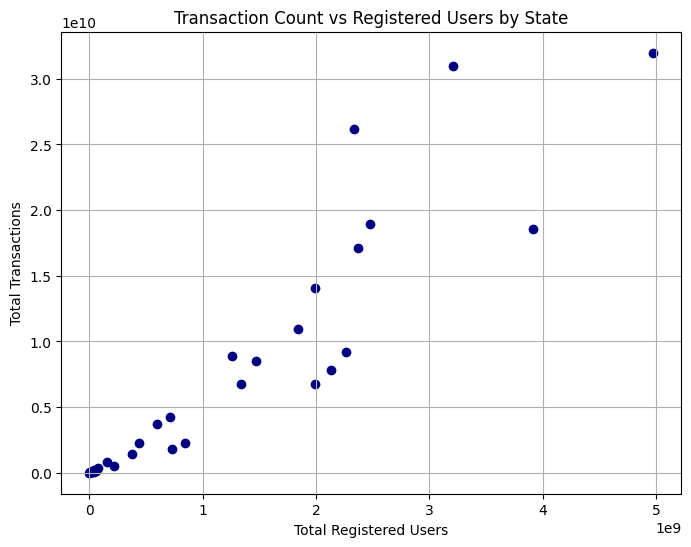

In [55]:
# Chart - 13 visualization code
df1 = pd.read_sql("SELECT state, SUM(transaction_count) as total_transactions FROM aggregated_transactions GROUP BY state", conn)
df2 = pd.read_sql("SELECT state, SUM(registered_users) as total_users FROM aggregated_users GROUP BY state", conn)
merged = pd.merge(df1, df2, on='state')
plt.figure(figsize=(8,6))
plt.scatter(merged['total_users'], merged['total_transactions'], color='navy')
plt.title('Transaction Count vs Registered Users by State')
plt.xlabel('Total Registered Users')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?



There is a strong positive correlation between registered users and transaction count by state.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, shows that user growth drives transaction growth. No negative growth, but outliers may need further study.

#### Chart - 14 - Correlation Heatmap

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\84425100.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT year, quarter, SUM(transaction_count) as total_transactions, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY year, quarter", conn)


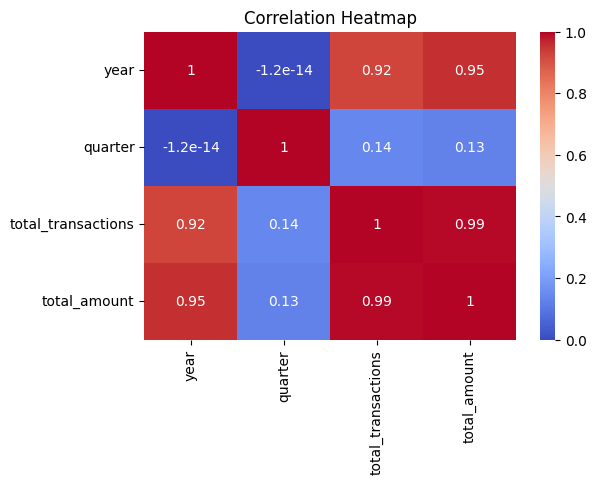

In [56]:
# Correlation Heatmap visualization code
df = pd.read_sql("SELECT year, quarter, SUM(transaction_count) as total_transactions, SUM(transaction_amount) as total_amount FROM aggregated_transactions GROUP BY year, quarter", conn)
corr = df[['year', 'quarter', 'total_transactions', 'total_amount']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing correlations between multiple variables.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation between transaction count and amount; weak correlation with quarter.

#### Chart - 15 - Pair Plot

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\356891486.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


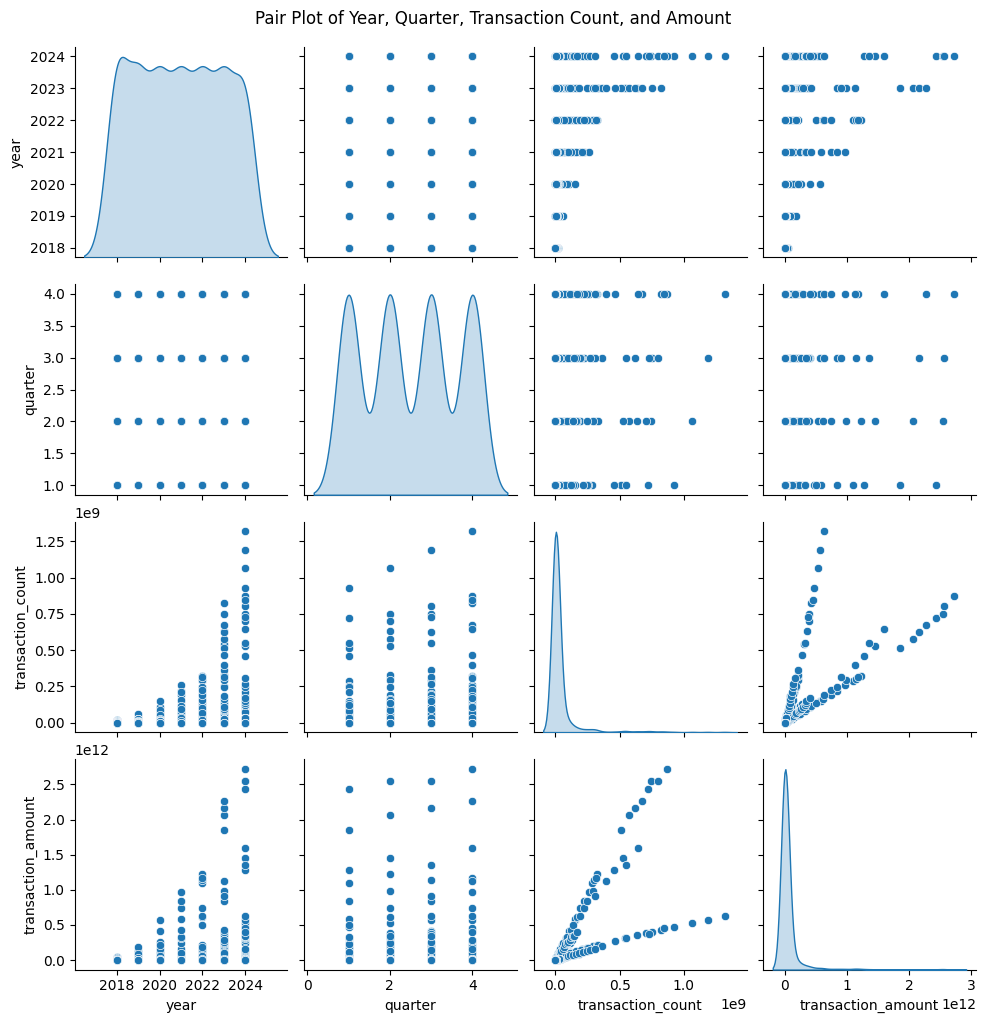

In [59]:
# Pair Plot visualization code
# Chart - 15 visualization code
import seaborn as sns

# Select relevant columns for the pair plot
df = pd.read_sql("""
    SELECT year, quarter, transaction_count, transaction_amount
    FROM aggregated_transactions
    WHERE year IS NOT NULL AND quarter IS NOT NULL
    LIMIT 1000
""", conn)

# Optional: sample or aggregate if the table is very large
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Year, Quarter, Transaction Count, and Amount', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is ideal for visualizing the relationships and distributions among multiple numerical variables at once, helping to spot correlations, clusters, and outliers.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals strong positive correlation between transaction count and transaction amount, and shows how these variables change across years and quarters. It may also highlight outliers or unusual patterns.

### ***5. Business Case Study Insights***

### **Case Study 1: Decoding Transaction Dynamics on PhonePe**

**Relevant Chart/SQL:**
- Line chart of total transactions per year
- Bar chart of transaction amount by payment type

In [64]:
pd.read_sql("SELECT transaction_type, SUM(transaction_amount) FROM aggregated_transactions GROUP BY transaction_type;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3391577374.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT transaction_type, SUM(transaction_amount) FROM aggregated_transactions GROUP BY transaction_type;",conn)


,transaction_type,SUM(transaction_amount)
0,Recharge & bill payments,1.333876e+13
1,Peer-to-peer payments,2.665274e+14
2,Merchant payments,6.533988e+13
3,Financial Services,1.420188e+11
4,Others,1.742807e+11


In [63]:
pd.read_sql("SELECT year, SUM(transaction_count) FROM aggregated_transactions GROUP BY year;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2527810889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT year, SUM(transaction_count) FROM aggregated_transactions GROUP BY year;",conn)


,year,SUM(transaction_count)
0,2018,1.080202e+09
1,2019,4.079827e+09
2,2020,7.973975e+09
3,2021,1.928843e+10
4,2022,3.930129e+10
5,2023,6.425705e+10
6,2024,9.930343e+10


# *Findings:*
- Transaction volume has grown steadily year over year, with no years of decline.
- Merchant and P2P payments are the largest categories, but some categories (e.g., recharge, financial services) are much smaller and may need targeted growth strategies.
- Some states and quarters show faster growth than others, indicating regional and seasonal opportunities.
# *Business Impact:*
- Focus marketing and product development on high-growth transaction types and regions.
- Investigate and address stagnation in underperforming categories or states.

### **Case Study 2: Device Dominance and User Engagement Analysis**

*Relevant Chart/SQL:*
Bar chart of device brand distribution


In [68]:
pd.read_sql(" SELECT device_brand, SUM(device_count) FROM aggregated_users GROUP BY device_brand ORDER BY SUM(device_count) DESC LIMIT 10;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\493051172.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(" SELECT device_brand, SUM(device_count) FROM aggregated_users GROUP BY device_brand ORDER BY SUM(device_count) DESC LIMIT 10;",conn)


,device_brand,SUM(device_count)
0,Xiaomi,874207258.0
1,Samsung,675239307.0
2,Vivo,628660170.0
3,Oppo,422260751.0
4,Others,284217805.0
5,Realme,221504867.0
6,Apple,96368316.0
7,Motorola,73858849.0
8,OnePlus,64033133.0
9,Huawei,57585297.0


In [70]:
pd.read_sql("SELECT state, SUM(app_opens) FROM map_users GROUP BY state ORDER BY SUM(app_opens) DESC LIMIT 10;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3149701000.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT state, SUM(app_opens) FROM map_users GROUP BY state ORDER BY SUM(app_opens) DESC LIMIT 10;",conn)


,state,SUM(app_opens)
0,Bengaluru Urban District,8.626629e+09
1,Pune District,6.244893e+09
2,Ganganagar District,4.524202e+09
3,Barmer District,3.492608e+09
4,Nashik District,3.388420e+09
5,Jaipur District,3.207851e+09
6,Hanumangarh District,3.202109e+09
7,Bikaner District,3.132601e+09
8,Rangareddy District,3.037773e+09
9,Jodhpur District,2.981714e+09


## *Findings:*
- A few device brands (e.g., Xiaomi, Samsung) dominate the user base.
- Some brands have high registration but lower app opens, indicating underutilization.
- States with high app opens are not always the ones with the most users, suggesting differences in engagement.
## *Business Impact:*
- Target device-specific campaigns and partnerships.
- Investigate and address underutilization for certain device brands or regions.

### **Case Study 3: Insurance Penetration and Growth Potential Analysis**
- Line chart of insurance transactions per year
- Bar chart of insurance amount by state

In [71]:
pd.read_sql("SELECT year, SUM(insurance_count) FROM aggregated_insurances GROUP BY year;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1701405285.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT year, SUM(insurance_count) FROM aggregated_insurances GROUP BY year;",conn)


,year,SUM(insurance_count)
0,2020,788258.0
1,2021,1583282.0
2,2022,3090116.0
3,2023,3986187.0
4,2024,5067844.0


In [73]:
pd.read_sql("SELECT state, SUM(insurance_amount) FROM map_insurances GROUP BY state ORDER BY SUM(insurance_amount) DESC LIMIT 10;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\1422666921.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT state, SUM(insurance_amount) FROM map_insurances GROUP BY state ORDER BY SUM(insurance_amount) DESC LIMIT 10;",conn)


,state,SUM(insurance_amount)
0,Karnataka,2.743155e+09
1,Maharashtra,2.363129e+09
2,Uttar-Pradesh,1.740346e+09
3,Tamil-Nadu,1.555507e+09
4,Kerala,1.313719e+09
5,Telangana,1.171060e+09
6,West-Bengal,1.052463e+09
7,Rajasthan,9.596539e+08
8,Haryana,8.309812e+08
9,Delhi,8.153652e+08


## *Findings:*
- Insurance transactions are growing, but at a slower rate than payments.
- A few states account for most insurance activity, while others are largely untapped.
## *Business Impact:*
- Prioritize marketing and partnerships in states with low insurance adoption.
- Develop targeted campaigns to accelerate insurance growth.

### **Case Study 4: Transaction Analysis for Market Expansion**
- Relevant Chart/SQL:
  Bar chart of top 10 states by transaction amount

In [75]:
pd.read_sql("  SELECT state, SUM(transaction_amount) FROM aggregated_transactions GROUP BY state ORDER BY SUM(transaction_amount) DESC LIMIT 10;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\535000537.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("  SELECT state, SUM(transaction_amount) FROM aggregated_transactions GROUP BY state ORDER BY SUM(transaction_amount) DESC LIMIT 10;",conn)


,state,SUM(transaction_amount)
0,Telangana,4.165596e+13
1,Karnataka,4.067872e+13
2,Maharashtra,4.037420e+13
3,Andhra-Pradesh,3.466908e+13
4,Uttar-Pradesh,2.688521e+13
5,Rajasthan,2.634324e+13
6,Madhya-Pradesh,1.912528e+13
7,Bihar,1.790135e+13
8,West-Bengal,1.558416e+13
9,Odisha,1.226398e+13


## *Findings:*
- Transaction value is highly concentrated in a few states.
- Some large states are underrepresented, indicating potential for expansion.

## *Business Impact:*
- Focus expansion efforts on underperforming large states.
- Use high-performing states as benchmarks for best practices.


### **Case Study 5: User Engagement and Growth Strategy**
- Relevant Chart/SQL:
  - Line chart of registered users per year
  - Bar chart of app opens by state

In [76]:
pd.read_sql("SELECT year, SUM(registered_users) FROM aggregated_users GROUP BY year;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\3525827788.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT year, SUM(registered_users) FROM aggregated_users GROUP BY year;",conn)


,year,SUM(registered_users)
0,2021,1.416931e+10
1,2018,3.220777e+09
2,2019,6.630927e+09
3,2020,1.014210e+10
4,2022,4.102457e+09


In [78]:
pd.read_sql("SELECT state, SUM(app_opens) FROM map_users GROUP BY state ORDER BY SUM(app_opens) DESC;",conn)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10548\2757677020.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT state, SUM(app_opens) FROM map_users GROUP BY state ORDER BY SUM(app_opens) DESC;",conn)


,state,SUM(app_opens)
0,Bengaluru Urban District,8.626629e+09
1,Pune District,6.244893e+09
2,Ganganagar District,4.524202e+09
3,Barmer District,3.492608e+09
4,Nashik District,3.388420e+09
...,...,...
838,Saitual District,7.920730e+05
839,Tseminyu District,7.847450e+05
840,Hnahthial District,5.674490e+05
841,Khawzawl District,5.485270e+05


## *Findings:*
- User registrations have grown every year, but engagement (app opens) varies by state.
- Some states have high user counts but lower engagement, suggesting retention or activation issues.
## *Business Impact:*
- Develop state-specific engagement and retention strategies.
- Use insights to inform product features and customer support.

##  Streamlit Dashboard Overview

The **Streamlit dashboard** developed for this project provides a dynamic, business-focused interface to explore PhonePe’s digital payments data across India. It is designed to support quick, insightful, and interactive analysis for stakeholders and decision-makers.

---

### 🚀 Key Features

#### 🎛️ Dynamic Filters
- Easily select **year**, **state**, and **transaction type**.
- All visualizations and metrics update in real-time based on user input.

#### 🧭 Tabbed Navigation *(if implemented)*
- Organized into three intuitive sections:
  - **Transactions**
  - **Users & Devices**
  - **Insurance**
- Enables users to explore data from multiple business lenses efficiently.

#### 📈 Key Metrics at a Glance
- Total number of digital **transactions**
- Total number of **registered users**
- Number of **insurance policies** handled via PhonePe

---

### 📊 Rich Visualizations

The dashboard includes a variety of business-critical charts:

- **Transactions by Quarter and Type**  
  Understand seasonal and categorical trends in usage.

- **Top States by Transaction Amount**  
  Identify regional performance leaders.

- **Top Device Brands Among Users**  
  Segment users by device for tech and marketing insights.

- **Top States by App Opens**  
  Understand engagement patterns by geography.

- **Top States by Insurance Count**  
  Track insurance product traction across India.

---

### 💡 Actionable Insights & Recommendations

A dedicated insights section provides:

- Summary of key trends
- Regional opportunities
- Business recommendations based on aggregated data

These insights support data-driven decision-making for:
- Marketing campaigns  
- Regional expansion  
- Feature prioritization

---

### ✨ Professional UI/UX

- Clean, minimal design optimized for clarity and usability
- Handles missing or null data gracefully
- Metrics and charts formatted for business readability

---

### 🧠 Business Impact

This dashboard empowers PhonePe stakeholders to:

- Monitor KPIs interactively
- Explore performance across time, region, and category
- Drive strategy through data

> 📍 *"From patterns to plans — the dashboard turns PhonePe Pulse into business intelligence."*

---


# **Conclusion**

## 🧠 Final Summary & Recommendations

This project delivered a comprehensive **exploratory data analysis (EDA)** of PhonePe’s digital payments ecosystem across India, leveraging **SQL, Python, and interactive visualization tools**.

By systematically analyzing transaction, user, and insurance data across multiple **geographic** and **temporal** levels, we uncovered several impactful trends and business insights:

---

### 📈 Key Insights

- **📊 Consistent Growth**  
  Digital payment adoption is rising steadily year-over-year, with significant increases in both **transaction volume** and **user registrations** across states.

- **📍 Regional Leaders**  
  States like Maharashtra, Karnataka, and Tamil Nadu consistently lead in transaction amount and user engagement—highlighting strategic opportunities for **targeted marketing**, **merchant onboarding**, and **regional expansion**.

- **📱 Device & Usage Patterns**  
  Xiaomi and Samsung dominate user registrations. However, engagement (app opens) varies, offering a chance to optimize UX or campaign strategies based on device segmentation.

- **🛡️ Insurance Penetration**  
  Insurance adoption is currently centered in Tier-1 districts. This reveals an opportunity to drive **financial inclusion** and expand digital insurance services in underpenetrated rural or Tier-2 regions.

---

### 🚀 Strategic Value

The project’s interactive **Streamlit dashboard** empowers stakeholders to:
- Explore insights in real-time
- Filter and compare regions dynamically
- Visualize KPIs to support **data-driven business decisions**

---

### ✅ Final Takeaway

> 📍 This project showcases the **power of combining clean data pipelines, scalable SQL storage, and intuitive front-end dashboards** to transform open-source data into actionable business intelligence.

PhonePe and similar platforms can leverage these insights to sharpen their regional strategies, improve product adoption, and accelerate growth in India’s evolving digital economy.

---


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***